<a href="https://colab.research.google.com/github/real-horizon02/Product-Return-Analysis/blob/main/Product%20Return%20Analysis%20Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Summary:
{'Total Returns': np.int64(2554), 'Total Return Value': np.int64(549802), 'Top Reason': 'Shipping Damage', 'Most Affected Category': 'Electronics'}


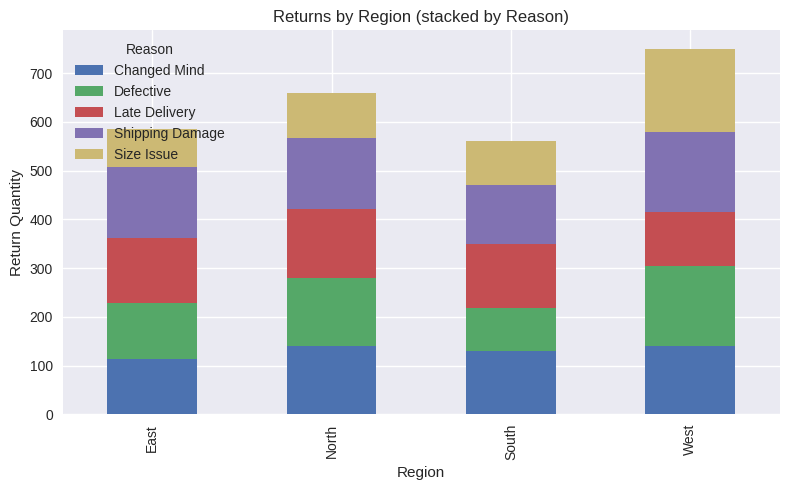

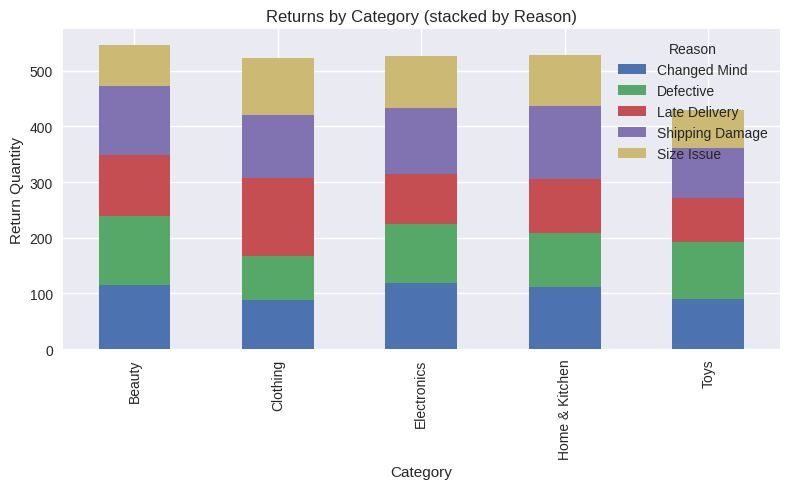

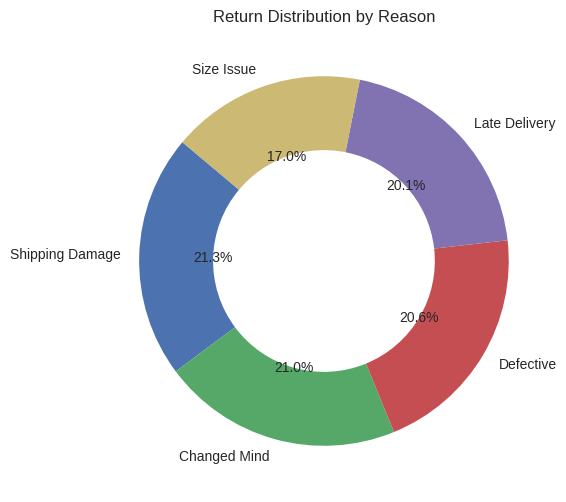

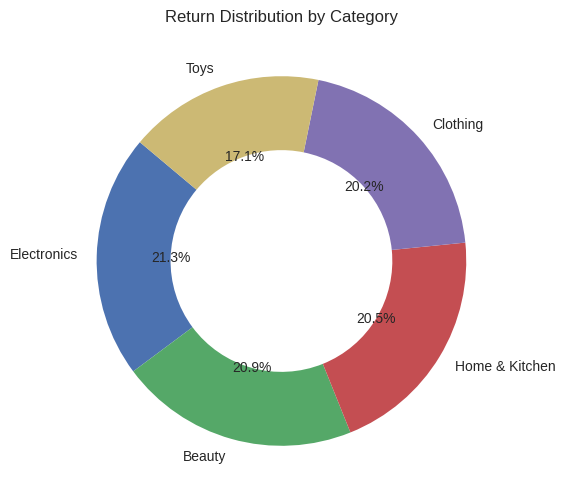

AttributeError: Can only use .dt accessor with datetimelike values

In [1]:
# Project Goal: Analyze product return patterns by region, reason, and category

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate / Load Dataset

np.random.seed(42)

regions = ["North", "South", "East", "West"]
categories = ["Electronics", "Clothing", "Home & Kitchen", "Toys", "Beauty"]
brands = ["Acme", "Globex", "Umbrella", "Soylent", "Initech"]
reasons = ["Defective", "Size Issue", "Changed Mind", "Shipping Damage", "Late Delivery"]
product_types = ["Standard", "Premium"]

# Loading dataset

df = pd.read_csv("product_returns.csv")


# Summaries

summary = {
    "Total Returns": df["Quantity"].sum(),
    "Total Return Value": df["Value"].sum(),
    "Top Reason": df["Reason"].value_counts().idxmax(),
    "Most Affected Category": df["Category"].value_counts().idxmax()
}
print("Summary:")
print(summary)

# Visualization

plt.style.use("seaborn-v0_8")

# Returns by Region & Reason (stacked bar)

region_reason = df.groupby(["Region", "Reason"])["Quantity"].sum().unstack(fill_value=0)
region_reason.plot(kind="bar", stacked=True, figsize=(8,5))
plt.title("Returns by Region (stacked by Reason)")
plt.ylabel("Return Quantity")
plt.tight_layout()
plt.show()

# Returns by Category & Reason (stacked bar)

cat_reason = df.groupby(["Category", "Reason"])["Quantity"].sum().unstack(fill_value=0)
cat_reason.plot(kind="bar", stacked=True, figsize=(8,5))
plt.title("Returns by Category (stacked by Reason)")
plt.ylabel("Return Quantity")
plt.tight_layout()
plt.show()

# Donut Chart: Returns by Reason

reason_counts = df["Reason"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(reason_counts, labels=reason_counts.index, autopct="%1.1f%%", startangle=140, wedgeprops=dict(width=0.4))
plt.title("Return Distribution by Reason")
plt.show()

# Donut Chart: Returns by Category

cat_counts = df["Category"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(cat_counts, labels=cat_counts.index, autopct="%1.1f%%", startangle=140, wedgeprops=dict(width=0.4))
plt.title("Return Distribution by Category")
plt.show()

# Monthly Trend of Returns

df["Month"] = df["Date"].dt.to_period("M")
monthly_trend = df.groupby("Month")["Quantity"].sum()
monthly_trend.plot(kind="line", marker="o", figsize=(8,4))
plt.title("Monthly Return Trend")
plt.ylabel("Total Returns")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

# Insights Example

print("\n Insights:")
print(f"- Total returns: {summary['Total Returns']}")
print(f"- Total return value: {summary['Total Return Value']}")
print(f"- Most common reason: {summary['Top Reason']}")
print(f"- Most affected category: {summary['Most Affected Category']}")
